In [1]:
from glob import glob

import anndata
import pandas as pd
import plotnine as p
import scanpy as sc
from scipy import stats
import scvi

%pylab inline

Global seed set to 0


Populating the interactive namespace from numpy and matplotlib


In [2]:
adata = anndata.read('Ren et al 2021/GSE158055_covid19_meta_S-M040-1_pbmcs.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 14565 × 27943
    obs: 'Meta sample', 'Sample name', 'title', 'organism', 'Patients', 'City', 'Age', 'Sex', 'Sample type', 'CoVID-19 severity', 'Sample time', 'Sampling day (Days after symptom onset)', 'SARS-CoV-2', 'Single cell sequencing platform', 'BCR single cell sequencing', 'TCR single cell sequencing', 'Outcome', 'Comorbidities', 'COVID-19-related medication and anti-microbials', 'Leukocytes [G/L]', 'Neutrophils [G/L]', 'Lymphocytes [G/L]', 'Unpublished', 'geo accession', 'instrument model'

In [4]:
adata.obs

,Meta sample,Sample name,title,organism,Patients,City,Age,Sex,Sample type,CoVID-19 severity,...,TCR single cell sequencing,Outcome,Comorbidities,COVID-19-related medication and anti-microbials,Leukocytes [G/L],Neutrophils [G/L],Lymphocytes [G/L],Unpublished,geo accession,instrument model
index,,,,,,,,,,,,,,,,,,,,,
d13_PGW8_AAACCTGAGAAACCAT,d13_PGW8,S-M040-1,S-M040-1,Homo sapients,P-M040,Shanghai,46,M,fresh PBMC,mild/moderate,...,Yes,discharged,none,"thymosin, no antibiotics and glucocorticoids",unknown,unknown,unknown,Yes,GSM4787362,Illumina NovaSeq 6000
d13_PGW8_AAACCTGAGAACAACT,d13_PGW8,S-M040-1,S-M040-1,Homo sapients,P-M040,Shanghai,46,M,fresh PBMC,mild/moderate,...,Yes,discharged,none,"thymosin, no antibiotics and glucocorticoids",unknown,unknown,unknown,Yes,GSM4787362,Illumina NovaSeq 6000
d13_PGW8_AAACCTGAGAGTTGGC,d13_PGW8,S-M040-1,S-M040-1,Homo sapients,P-M040,Shanghai,46,M,fresh PBMC,mild/moderate,...,Yes,discharged,none,"thymosin, no antibiotics and glucocorticoids",unknown,unknown,unknown,Yes,GSM4787362,Illumina NovaSeq 6000
d13_PGW8_AAACCTGAGCAGCCTC,d13_PGW8,S-M040-1,S-M040-1,Homo sapients,P-M040,Shanghai,46,M,fresh PBMC,mild/moderate,...,Yes,discharged,none,"thymosin, no antibiotics and glucocorticoids",unknown,unknown,unknown,Yes,GSM4787362,Illumina NovaSeq 6000
d13_PGW8_AAACCTGAGCAGGCTA,d13_PGW8,S-M040-1,S-M040-1,Homo sapients,P-M040,Shanghai,46,M,fresh PBMC,mild/moderate,...,Yes,discharged,none,"thymosin, no antibiotics and glucocorticoids",unknown,unknown,unknown,Yes,GSM4787362,Illumina NovaSeq 6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d13_PGW8_TTTGTCATCAGTTGAC,d13_PGW8,S-M040-1,S-M040-1,Homo sapients,P-M040,Shanghai,46,M,fresh PBMC,mild/moderate,...,Yes,discharged,none,"thymosin, no antibiotics and glucocorticoids",unknown,unknown,unknown,Yes,GSM4787362,Illumina NovaSeq 6000
d13_PGW8_TTTGTCATCCAAACAC,d13_PGW8,S-M040-1,S-M040-1,Homo sapients,P-M040,Shanghai,46,M,fresh PBMC,mild/moderate,...,Yes,discharged,none,"thymosin, no antibiotics and glucocorticoids",unknown,unknown,unknown,Yes,GSM4787362,Illumina NovaSeq 6000
d13_PGW8_TTTGTCATCCACGTGG,d13_PGW8,S-M040-1,S-M040-1,Homo sapients,P-M040,Shanghai,46,M,fresh PBMC,mild/moderate,...,Yes,discharged,none,"thymosin, no antibiotics and glucocorticoids",unknown,unknown,unknown,Yes,GSM4787362,Illumina NovaSeq 6000


In [5]:
gene_panel = [
    'CLEC9A', 'CADM1', 'CLEC10A', 'CD1C', 'CD14', 'VCAN', 'CCR7', 'LAMP3', 'AXL', 'SIGLEC6', 'LILRA4', 'ITM2C',
    'GZMB', 'IL1B', 'IER3', 'LDLR', 'CD83', 'S100A12', 'CSF3R', 'FCGR3A', 'MS4A7', 'LILRB1', 'CSF1R',
    'CDKN1C', 'C1QA', 'C1QB', 'C1QC', 'CCR1', 'MARCO', 'MKI67', 'TOP2A',
    
    'CD141', 'CLEC9A', 'KIT', 'BTLA', 'CD1C', 'CD101', 'FCER1a', 'CD5', 'CD123', 'CD45RA', 'CD304', 'CD14',
    'CD99', 'CD64', 'CR1', 'ITGAM', 'CD16', 'C5AR1', 'CX3CR1',
    
    'NFKBIA', 'FOSB', 'IL1B', 'S100A8', 'S100A9', 'CD74', 'B2M', 'FTL', 'IL16', 'CCL2', 'CCL8', 'CCL7',
    'CCL4L2', 'CCL3', 'CCL4', 'CCL18', 'CXCL8', 'CXCL16', 'CXCL10',
    
    'TNF', 'IL6', 'IL12A', 'IL12B', 'IL23A', 'IL10', 'IL27',
    
    'TIMP1', 'GP9', 'MPIG6B', 'PF4', 'CLEC1B', 'RAP1B', 'SRGN', 'PPBP', 'STXBP2', 'PFN1',
    
    'CD34', 'AVP', 'CD38', 'GATA1', 'MPO',
    
    'CD3G', 'CCR7', 'CD27', 'CD4', 'CD28', 'TNFRSF9', 'CCR6', 'CD40LG', 'TBX21', 'GATA3', 'RORC', 'IKZF2',
    'FOXP3', 'CTLA4', 'PDCD1', 'CXCR5', 'CD8A', 'GZMB', 'HLA-DRB1', 'IFNG', 'LAG3', 'TOX', 'IL7R',
    'KLRG1', 'TRDV2', 'TRGV9', 'TRAV1.2', 'NCAM1', 'NCR1', 'FCGR3A',
    
    'CD3', 'CCR7', 'CD45RO', 'CD27', 'CD28', 'CD62L', 'CD25', 'CTLA4', 'CXCR5', 'CD40LG', 'ICOS', 'CXCR3',
    'CD8',
    
    'MS4A1', 'CD19', 'CD40', 'CD69', 'CD22', 'FCER2', 'CD24', 'CR2', 'MME', 'MKI67', 'IGHD', 'IGHM',
    'IGHA1', 'IGHG1', 'MZB1', 'CD27', 'TNFRSF13B', 'CD38', 'SDC1',
    
    'FOS', 'KLF2', 'PNRC1', 'NFKB1', 'JUN', 'DUSP1', 'FOSB', 'GADD45B', 'IER2', 'ZFP36', 'PPP1R15A',
    'NFKBIA', 'CD69', 'BTG2', 'CD79A', 'CD79B', 'PTPRC', 'LYIN', 'BLNK', 'SIGLEC10', 'PECAM1',
]

In [6]:
adata.var['feature_name'] = adata.var.index

In [7]:
var_idx = adata.var.query('feature_name in @gene_panel').index

In [8]:
var_idx

Index(['AVP', 'AXL', 'B2M', 'BLNK', 'BTG2', 'BTLA', 'C1QA', 'C1QB', 'C1QC',
       'C5AR1',
       ...
       'TIMP1', 'TNF', 'TNFRSF13B', 'TNFRSF9', 'TOP2A', 'TOX', 'TRDV2',
       'TRGV9', 'VCAN', 'ZFP36'],
      dtype='object', length=141)

In [9]:
fadata = adata[:, var_idx].copy()

In [10]:
adata.X[:20, :10].todense()

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

In [11]:
fadata.obs['total_counts'] = np.array(fadata.X.sum(1))

In [12]:
fadata.obs

,Meta sample,Sample name,title,organism,Patients,City,Age,Sex,Sample type,CoVID-19 severity,...,Outcome,Comorbidities,COVID-19-related medication and anti-microbials,Leukocytes [G/L],Neutrophils [G/L],Lymphocytes [G/L],Unpublished,geo accession,instrument model,total_counts
index,,,,,,,,,,,,,,,,,,,,,
d13_PGW8_AAACCTGAGAAACCAT,d13_PGW8,S-M040-1,S-M040-1,Homo sapients,P-M040,Shanghai,46,M,fresh PBMC,mild/moderate,...,discharged,none,"thymosin, no antibiotics and glucocorticoids",unknown,unknown,unknown,Yes,GSM4787362,Illumina NovaSeq 6000,66.0
d13_PGW8_AAACCTGAGAACAACT,d13_PGW8,S-M040-1,S-M040-1,Homo sapients,P-M040,Shanghai,46,M,fresh PBMC,mild/moderate,...,discharged,none,"thymosin, no antibiotics and glucocorticoids",unknown,unknown,unknown,Yes,GSM4787362,Illumina NovaSeq 6000,237.0
d13_PGW8_AAACCTGAGAGTTGGC,d13_PGW8,S-M040-1,S-M040-1,Homo sapients,P-M040,Shanghai,46,M,fresh PBMC,mild/moderate,...,discharged,none,"thymosin, no antibiotics and glucocorticoids",unknown,unknown,unknown,Yes,GSM4787362,Illumina NovaSeq 6000,247.0
d13_PGW8_AAACCTGAGCAGCCTC,d13_PGW8,S-M040-1,S-M040-1,Homo sapients,P-M040,Shanghai,46,M,fresh PBMC,mild/moderate,...,discharged,none,"thymosin, no antibiotics and glucocorticoids",unknown,unknown,unknown,Yes,GSM4787362,Illumina NovaSeq 6000,635.0
d13_PGW8_AAACCTGAGCAGGCTA,d13_PGW8,S-M040-1,S-M040-1,Homo sapients,P-M040,Shanghai,46,M,fresh PBMC,mild/moderate,...,discharged,none,"thymosin, no antibiotics and glucocorticoids",unknown,unknown,unknown,Yes,GSM4787362,Illumina NovaSeq 6000,317.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d13_PGW8_TTTGTCATCAGTTGAC,d13_PGW8,S-M040-1,S-M040-1,Homo sapients,P-M040,Shanghai,46,M,fresh PBMC,mild/moderate,...,discharged,none,"thymosin, no antibiotics and glucocorticoids",unknown,unknown,unknown,Yes,GSM4787362,Illumina NovaSeq 6000,155.0
d13_PGW8_TTTGTCATCCAAACAC,d13_PGW8,S-M040-1,S-M040-1,Homo sapients,P-M040,Shanghai,46,M,fresh PBMC,mild/moderate,...,discharged,none,"thymosin, no antibiotics and glucocorticoids",unknown,unknown,unknown,Yes,GSM4787362,Illumina NovaSeq 6000,681.0
d13_PGW8_TTTGTCATCCACGTGG,d13_PGW8,S-M040-1,S-M040-1,Homo sapients,P-M040,Shanghai,46,M,fresh PBMC,mild/moderate,...,discharged,none,"thymosin, no antibiotics and glucocorticoids",unknown,unknown,unknown,Yes,GSM4787362,Illumina NovaSeq 6000,271.0


In [13]:
scvi.model.SCVI.setup_anndata(fadata)

INFO      No batch_key inputted, assuming all cells are same batch                           
INFO      No label_key inputted, assuming all cells have same label                          
INFO      Using data from adata.X                                                            
INFO      Successfully registered anndata object containing 14565 cells, 141 vars, 1 batches,
          1 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0     
          extra continuous covariates.                                                       
INFO      Please do not further modify adata until model is trained.                         


In [14]:
1e6 / 15000

66.66666666666667

In [15]:
vae = scvi.model.SCVI(fadata, n_layers = 2, n_latent = 2, gene_likelihood = "poisson")

In [16]:
vae.train(max_epochs = 250, use_gpu = True)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 250/250: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [06:21<00:00,  1.53s/it, loss=75.7, v_num=1]


In [17]:
fadata.obsm["X_scVI"] = vae.get_latent_representation()

In [18]:
for i, z in enumerate(fadata.obsm['X_scVI'].T):
    fadata.obs[f'Z_{i + 1}'] = z

C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6 x 6 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Figures/1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


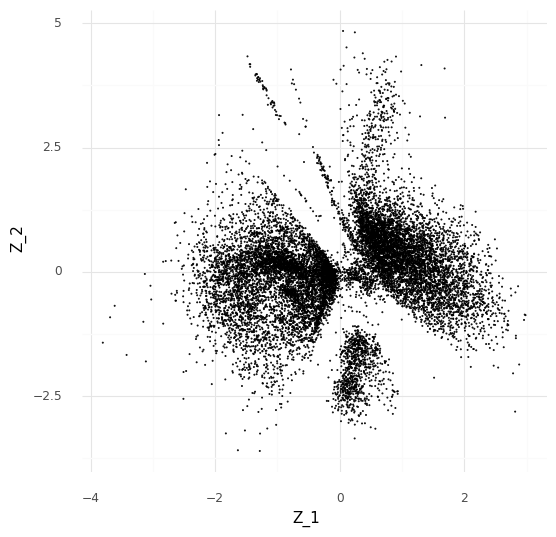

<ggplot: (-9223371905306500924)>


In [19]:
p.options.figure_size = 6, 6

p_ = (
    p.ggplot(p.aes(x = 'Z_1', y = 'Z_2'), fadata.obs)
    + p.geom_point(shape = '.', size = 0.1)
    + p.theme_minimal()
)

p_.save('Figures/1.png')
print(p_)

In [20]:
cell_a_idx = 'd13_PGW8_CGGAGTCCAGAGTGTG'
cell_b_idx = 'd13_PGW8_TAGAGCTAGAGCTATA'

C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6 x 6 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Figures/2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


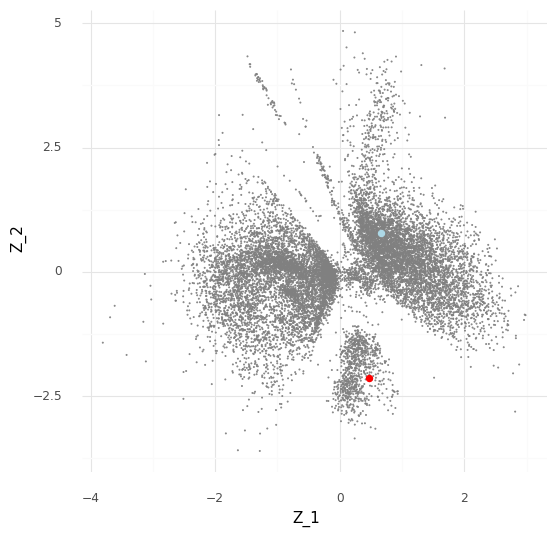

<ggplot: (-9223371905113029668)>


In [135]:
p.options.figure_size = 6, 6

p_ = (
    p.ggplot(p.aes(x = 'Z_1', y = 'Z_2'), fadata.obs)
    + p.geom_point(shape = '.', size = 0.1, color = 'grey')
    + p.geom_point(size = 2, color = 'red', data = fadata.obs.loc[[cell_a_idx]])
    + p.geom_point(size = 2, color = 'lightblue', data = fadata.obs.loc[[cell_b_idx]])
    + p.theme_minimal()
)

p_.save('Figures/2.png')
print(p_)

In [22]:
s_Zs = []
for i in range(128):
    s_Z = vae.get_latent_representation(fadata[[cell_a_idx]].copy(), give_mean = False, )
    s_Zs += [{'Z_1': s_Z[0, 0], 'Z_2': s_Z[0, 1]}]
    
Z_samples_a = pd.DataFrame(s_Zs)

s_Zs = []
for i in range(128):
    s_Z = vae.get_latent_representation(fadata[[cell_b_idx]].copy(), give_mean = False, )
    s_Zs += [{'Z_1': s_Z[0, 0], 'Z_2': s_Z[0, 1]}]
    
Z_samples_b = pd.DataFrame(s_Zs)

C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6 x 6 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Figures/3.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


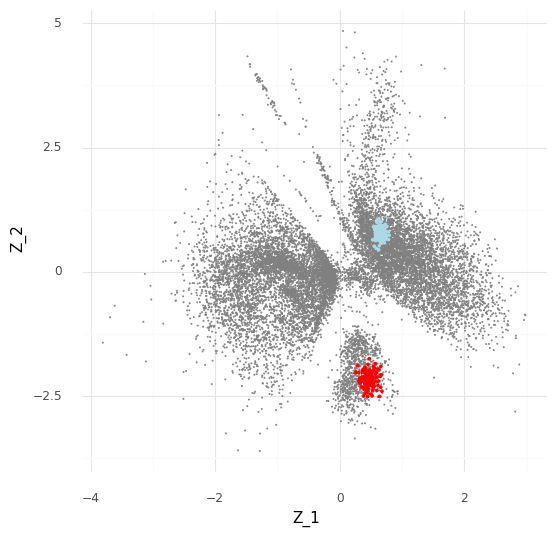

<ggplot: (-9223371905147902880)>


In [23]:
p_ = (
    p.ggplot(p.aes(x = 'Z_1', y = 'Z_2'), fadata.obs)
    + p.geom_point(shape = '.', size = 0.1, color = 'grey')
    + p.geom_point(shape = '.', color = 'red', data = Z_samples_a)
    + p.geom_point(shape = '.', color = 'lightblue', data = Z_samples_b)
    + p.theme_minimal()
)

p_.save('Figures/3.png')
print(p_)

In [24]:
lambda_samples_a = vae.get_normalized_expression(
    fadata[[cell_a_idx]].copy(),
    library_size = 1.0,
    return_mean = False,
    n_samples = 128
)

slambda_samples_a = pd.DataFrame(
    lambda_samples_a[:, 0, :],
    columns = scvi.model._utils._get_var_names_from_setup_anndata(fadata)
)

In [25]:
top_genes_a = (
    pd.Series(np.array(fadata[[cell_a_idx]].X.todense())[0, :], index = fadata.var.index)
    .reset_index()
    .rename(columns = {0: 'counts'})
    .sort_values('counts', ascending = False)
    .head(10)
    .set_index('index')
)

top_genes_a

,counts
index,
CD74,68.0
B2M,36.0
FTL,11.0
HLA-DRB1,7.0
IGHM,6.0
CD79A,6.0
JUN,5.0
MS4A1,4.0
PFN1,4.0


In [29]:
sp_samples_a = pd.DataFrame(
    stats.poisson.rvs(slambda_samples_a * 162),
    index = slambda_samples_a.index,
    columns = slambda_samples_a.columns
)

In [30]:
fadatac_a = fadata[[cell_a_idx]].copy()
sfadatac_a = pd.DataFrame(fadatac_a.X.todense(), columns = fadata.var.index)

In [31]:
lambda_samples_b = vae.get_normalized_expression(
    fadata[[cell_b_idx]].copy(),
    library_size = 1.0,
    return_mean = False,
    n_samples = 128
)

slambda_samples_b = pd.DataFrame(
    lambda_samples_b[:, 0, :],
    columns = scvi.model._utils._get_var_names_from_setup_anndata(fadata)
)

In [32]:
top_genes_b = (
    pd.Series(np.array(fadata[[cell_b_idx]].X.todense())[0, :], index = fadata.var.index)
    .reset_index()
    .rename(columns = {0: 'counts'})
    .sort_values('counts', ascending = False)
    .head(10)
    .set_index('index')
)

top_genes_b

,counts
index,
FTL,54.0
S100A9,33.0
S100A8,20.0
CD74,18.0
B2M,17.0
PFN1,8.0
ZFP36,4.0
PNRC1,3.0
FOS,3.0


In [34]:
top_genes_both = top_genes_a.head(6).index.union(top_genes_b.head(6).index).union(pd.Index(['CD24']))

In [35]:
slambda_samples_both = pd.concat((
    slambda_samples_a[top_genes_both].melt().assign(cell = 'a'),
    slambda_samples_b[top_genes_both].melt().assign(cell = 'b')
))

In [36]:
fadatac_b = fadata[[cell_b_idx]].copy()
sfadatac_b = pd.DataFrame(fadatac_b.X.todense(), columns = fadata.var.index)

In [37]:
sfadatac_a.sum(1)

0    162.0
dtype: float32

In [151]:
1 / 162

0.006172839506172839

In [38]:
sfadatac_b.sum(1)

0    175.0
dtype: float32

In [152]:
1 / 175

0.005714285714285714

In [39]:
sfadatac_both = pd.concat((
    sfadatac_a[top_genes_both].melt().assign(cell = 'a', l = 162.),
    sfadatac_b[top_genes_both].melt().assign(cell = 'b', l = 175.)
))

In [40]:
slambda_samples_both['l'] = slambda_samples_both['cell'].map({'a': 162, 'b': 175})
slambda_samples_both['r'] = slambda_samples_both['l'] * slambda_samples_both['value']
slambda_samples_both['counts'] = stats.poisson.rvs(slambda_samples_both['r'])

C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 8 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Figures/4.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\facets\facet_grid.py:136: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  margin_vars = [list(data.columns & self.rows),
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\facets\facet_grid.py:137: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  list(data.columns & self.cols)]
C:\Users\vale\Anaconda3\lib\site-packages\pandas\core\arraylike.py:35

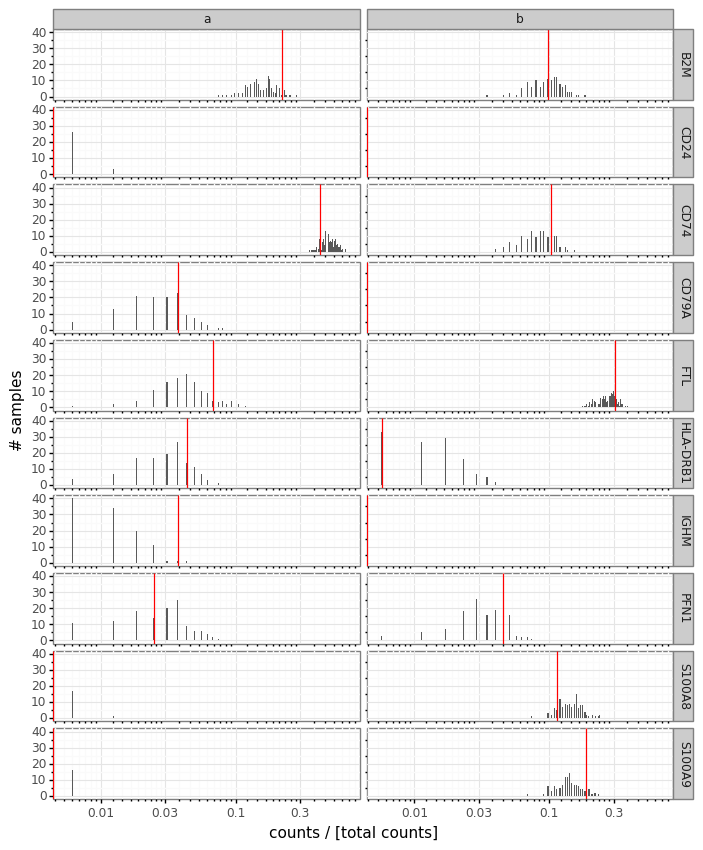

<ggplot: (-9223371905119306236)>


In [41]:
p.options.figure_size = 8, 10

p_ = (
    p.ggplot(p.aes(x = 'counts / l'), slambda_samples_both)
    + p.geom_histogram(bins = 256, )
    + p.geom_vline(p.aes(xintercept = 'value / l'), color = 'red', data = sfadatac_both)
    + p.scale_x_log10()
    + p.theme_bw()
    + p.facet_grid('variable ~ cell')
    + p.labs(x = 'counts / [total counts]', y = '# samples')
)

p_.save('Figures/4.png')
print(p_)

C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 8 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Figures/5.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\facets\facet_grid.py:136: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  margin_vars = [list(data.columns & self.rows),
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\facets\facet_grid.py:137: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  list(data.columns & self.cols)]
C:\Users\vale\Anaconda3\lib\site-packages\pandas\core\arraylike.py:35

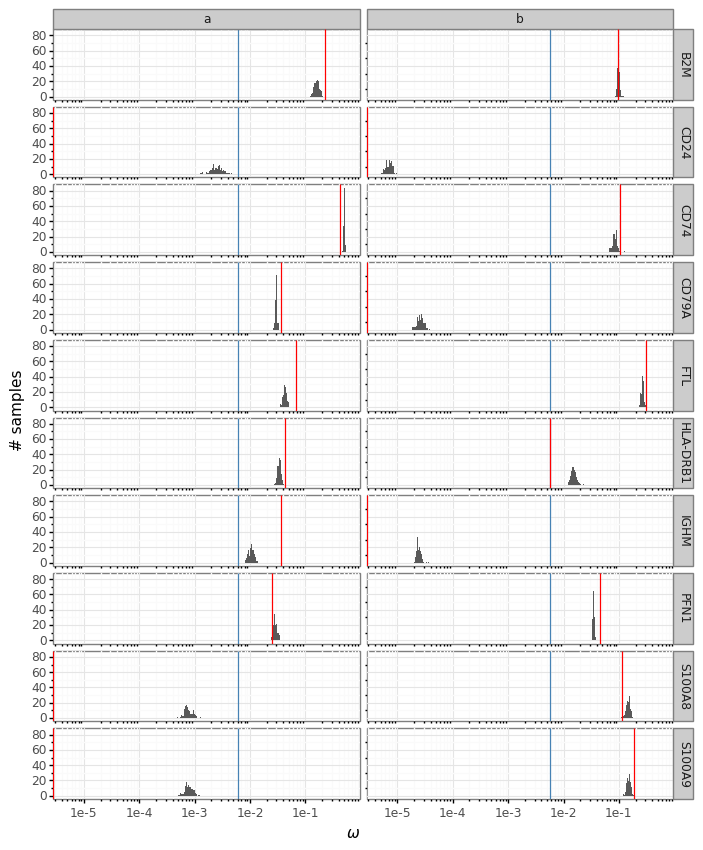

<ggplot: (-9223371905117852268)>


In [42]:
p.options.figure_size = 8, 10

p_ = (
    p.ggplot(p.aes(x = 'value'), slambda_samples_both)
    + p.geom_histogram(bins = 256, )
    + p.geom_vline(p.aes(xintercept = '1. / l'), color = 'steelblue', data = sfadatac_both)
    + p.geom_vline(p.aes(xintercept = 'value / l'), color = 'red', data = sfadatac_both)
    + p.scale_x_log10()
    + p.theme_bw()
    + p.facet_grid('variable ~ cell')
    + p.labs(x = r'$\omega$', y = '# samples')
)

p_.save('Figures/5.png')
print(p_)

In [43]:
# Comparing two cells

In [136]:
lambda_samples_a = vae.get_normalized_expression(
    fadata[[cell_a_idx]].copy(),
    library_size = 1.0,
    return_mean = False,
    n_samples = 5000
)

slambda_samples_a = pd.DataFrame(
    lambda_samples_a[:, 0, :],
    columns = scvi.model._utils._get_var_names_from_setup_anndata(fadata)
)

lambda_samples_b = vae.get_normalized_expression(
    fadata[[cell_b_idx]].copy(),
    library_size = 1.0,
    return_mean = False,
    n_samples = 5000
)

slambda_samples_b = pd.DataFrame(
    lambda_samples_b[:, 0, :],
    columns = scvi.model._utils._get_var_names_from_setup_anndata(fadata)
)

In [137]:
g_ = 'CD24'

slambda_samples_both = pd.concat((
    slambda_samples_a[[g_]].assign(cell = 'a'),
    slambda_samples_b[[g_]].assign(cell = 'b')
))

C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Figures/6.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\facets\facet_grid.py:136: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  margin_vars = [list(data.columns & self.rows),
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\facets\facet_grid.py:137: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  list(data.columns & self.cols)]
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\facets\facet_grid.p

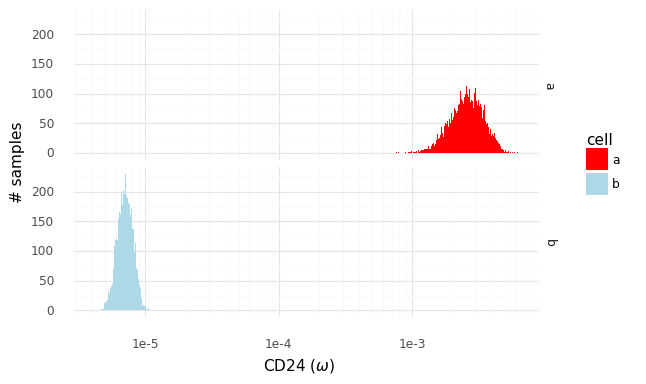

<ggplot: (-9223371905147903252)>


In [138]:
p.options.figure_size = 6, 4

p_ = (
    p.ggplot(p.aes(x = g_, fill = 'cell'), slambda_samples_both)
    + p.geom_histogram(bins = 512, )
    + p.scale_x_log10()
    + p.scale_fill_manual({'a': 'red', 'b': 'lightblue'})
    + p.theme_minimal()
    + p.facet_grid('cell ~ .')
    + p.labs(x = f'{g_} ' + r'$( \omega )$', y = '# samples')
)

p_.save('Figures/6.png')
print(p_)

In [139]:
delta = 0.25

In [140]:
fold_changes = pd.Series(
    slambda_samples_a[g_].pipe(np.array)
    / slambda_samples_b[g_].pipe(np.array)
).rename('FC').to_frame()

fold_changes = fold_changes.assign(is_de = lambda d: np.abs(np.log2(d['FC'])) > delta)
fold_changes['is_de'] = fold_changes['is_de'].pipe(pd.Categorical, categories = {True, False})

C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6 x 2 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Figures/7.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


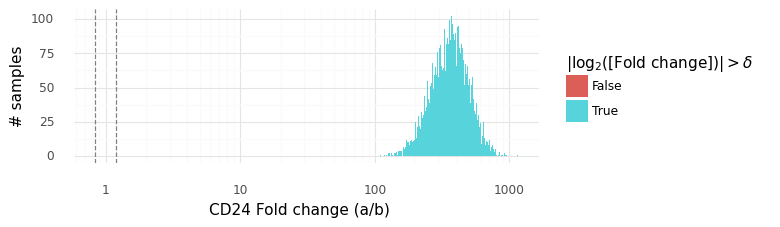

<ggplot: (-9223371905118426932)>


In [141]:
p.options.figure_size = 6, 2

p_ = (
    p.ggplot(p.aes(x = 'FC', fill = 'is_de'), fold_changes)
    + p.geom_histogram(bins = 512)
    + p.geom_vline(xintercept = [2 ** -delta, 2 ** delta], color = 'grey', linetype = 'dashed')
    + p.scale_x_log10()
    + p.theme_minimal()
    + p.labs(x = f'{g_} Fold change (a/b)', y = '# samples', fill = r'$ | \log_2( $[Fold change]$ )| > \delta $')
)

p_.save('Figures/7.png')
print(p_)

In [142]:
# Comparing populations of cells

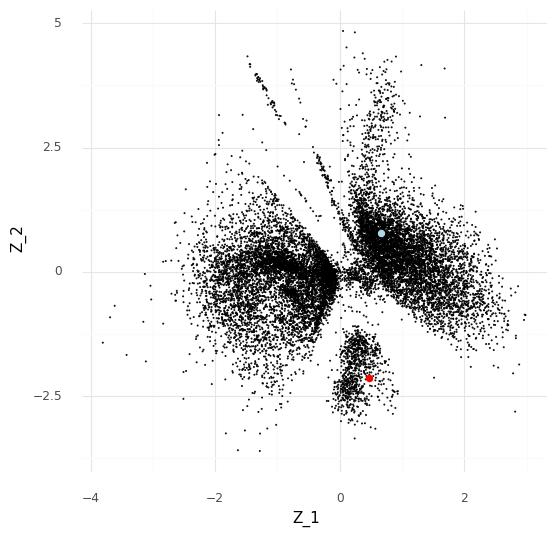

<ggplot: (-9223371905118483304)>

In [143]:
p.options.figure_size = 6, 6

(
    p.ggplot(p.aes(x = 'Z_1', y = 'Z_2'), fadata.obs)
    + p.geom_point(shape = '.', size = 0.1)
    + p.geom_point(size = 2, color = 'red', data = fadata.obs.loc[[cell_a_idx]])
    + p.geom_point(size = 2, color = 'lightblue', data = fadata.obs.loc[[cell_b_idx]])
    + p.theme_minimal()
)

In [144]:
z1 = fadata.obs.loc[[cell_a_idx]]['Z_1'][0]
z2 = fadata.obs.loc[[cell_a_idx]]['Z_2'][0]

A_idx = fadata.obs.query('@z1 - 0.5 < Z_1 < @z1 + 0.5').query('@z2 - 0.5 < Z_2 < @z2 + 0.5').index

fadata.obs['group'] = 'B'
fadata.obs.loc[A_idx, 'group'] = 'A'

C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6 x 6 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Figures/8.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


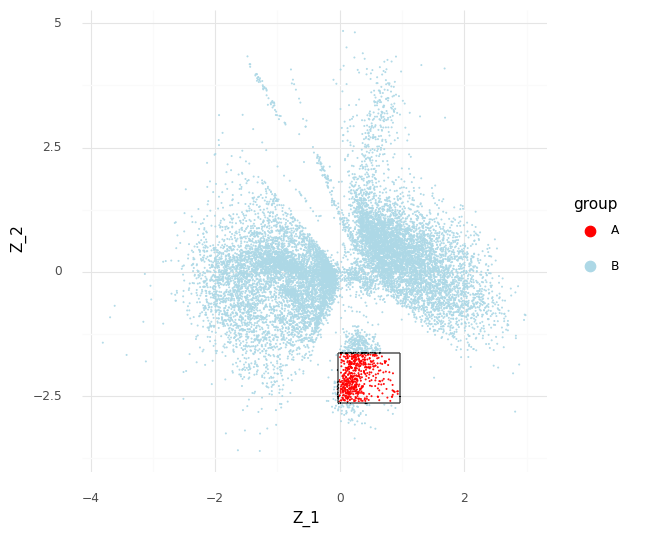

<ggplot: (-9223371905119792104)>


In [145]:
p.options.figure_size = 6, 6

p_ = (
    p.ggplot(p.aes(x = 'Z_1', y = 'Z_2', color = 'group'), fadata.obs)
    + p.geom_point(shape = '.', size = 0.1)
    + p.geom_rect(
        xmin = z1 - 0.5,
        xmax = z1 + 0.5,
        ymin = z2 - 0.5,
        ymax = z2 + 0.5,
        fill = None,
        color = 'k',
        size = 0.01,
        linetype = ':'
    )
    + p.scale_color_manual({'A': 'red', 'B': 'lightblue'})
    + p.theme_minimal()
    + p.guides(color = p.guide_legend(override_aes = {'size': 8}))
)

p_.save('Figures/8.png')
print(p_)

In [58]:
fadata.obs['group'].value_counts()

B    14048
A      517
Name: group, dtype: int64

In [59]:
de_results = vae.differential_expression(groupby = 'group')

DE...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.96s/it]


In [60]:
de_results.query('group1 == "A"').sort_values('lfc_mean', ascending = False).head(20)

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
MS4A1,0.9878,0.0122,4.394043,0.023544,0.000641,0.0,0.25,9.949182,9.553059,3.371948,...,4.586076,0.138809,0.938104,0.036375,217.468536,6.887310,True,A vs Rest,A,Rest
CD19,0.9906,0.0094,4.657600,0.003841,0.000093,0.0,0.25,9.937742,9.913342,2.703030,...,0.858800,0.022779,0.473888,0.014664,39.339100,1.107497,True,A vs Rest,A,Rest
CD24,0.9956,0.0044,5.421739,0.003776,0.000130,0.0,0.25,9.803099,9.680730,3.039260,...,0.570599,0.029115,0.390716,0.017227,33.359871,1.547874,True,A vs Rest,A,Rest
FCER2,0.9980,0.0020,6.212601,0.007771,0.000170,0.0,0.25,9.767413,9.993206,2.844932,...,1.270794,0.026765,0.557060,0.011745,71.874725,1.416087,True,A vs Rest,A,Rest
CD79A,0.9800,0.0200,3.891820,0.027589,0.000753,0.0,0.25,9.746442,9.866278,2.406688,...,4.949714,0.164365,0.969052,0.037870,250.884033,7.905702,True,A vs Rest,A,Rest
IGHD,0.9978,0.0022,6.117091,0.003146,0.000066,0.0,0.25,9.547142,9.531031,2.545509,...,0.553191,0.011247,0.373308,0.007047,30.996370,0.642181,True,A vs Rest,A,Rest
CR2,0.9946,0.0054,5.215940,0.000313,0.000007,0.0,0.25,9.395325,9.260487,3.110814,...,0.052224,0.001780,0.048356,0.001637,2.991727,0.074845,True,A vs Rest,A,Rest
CXCR5,0.9916,0.0084,4.771087,0.000716,0.000030,0.0,0.25,9.373365,9.126846,4.896171,...,0.104449,0.004200,0.102515,0.004129,6.660637,0.271378,True,A vs Rest,A,Rest
IGHA1,0.9966,0.0034,5.680571,0.002151,0.000202,0.0,0.25,8.989381,8.117929,4.887040,...,0.394584,0.083998,0.160542,0.016728,18.020470,2.932009,True,A vs Rest,A,Rest
IGHM,0.9946,0.0054,5.215940,0.011675,0.000355,0.0,0.25,8.955966,9.156786,2.217140,...,2.119925,0.084069,0.764023,0.024701,118.353539,3.593605,True,A vs Rest,A,Rest


In [61]:
de_results.query('group1 == "A"').sort_values('lfc_mean', ascending = False).tail(20)

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
C1QB,0.9746,0.0254,3.647278,9.787333e-08,0.000081,0.0,0.25,-3.442135,-3.669203,5.632582,...,0.000000,0.053388,0.000000,0.005410,0.000000,0.795138,True,A vs Rest,A,Rest
LDLR,0.9944,0.0056,5.179371,1.279888e-05,0.000155,0.0,0.25,-3.537043,-3.611787,0.928190,...,0.000000,0.042639,0.000000,0.039436,0.000000,1.740111,True,A vs Rest,A,Rest
CD28,0.9578,0.0422,3.122219,4.142017e-06,0.000247,0.0,0.25,-3.539375,-3.120593,3.960217,...,0.000000,0.032603,0.000000,0.026338,0.000000,2.213008,True,A vs Rest,A,Rest
CSF1R,0.9588,0.0412,3.147244,4.543577e-06,0.000402,0.0,0.25,-3.553261,-2.761290,4.021352,...,0.000000,0.153543,0.000000,0.105780,0.000000,4.205485,True,A vs Rest,A,Rest
NCAM1,0.9870,0.0130,4.329720,6.337612e-06,0.000198,0.0,0.25,-3.589819,-3.010857,2.254043,...,0.000000,0.033386,0.000000,0.029328,0.000000,2.017489,True,A vs Rest,A,Rest
SRGN,0.9978,0.0022,6.117091,6.452329e-04,0.008689,0.0,0.25,-3.693724,-3.775918,0.846385,...,0.090909,1.939999,0.081238,0.725797,3.781775,81.926949,True,A vs Rest,A,Rest
S100A12,0.9288,0.0712,2.568400,1.438949e-04,0.011994,0.0,0.25,-3.770047,-1.768354,3.399537,...,0.032882,4.838667,0.032882,0.438497,1.763178,120.014374,True,A vs Rest,A,Rest
IL1B,0.9814,0.0186,3.965818,2.460567e-06,0.000083,0.0,0.25,-3.808950,-3.603377,2.383927,...,0.000000,0.030538,0.000000,0.025626,0.000000,0.990424,True,A vs Rest,A,Rest
IER3,0.9924,0.0076,4.871977,1.895126e-05,0.000333,0.0,0.25,-3.824254,-3.825351,1.222552,...,0.001934,0.100298,0.001934,0.082218,0.162541,3.530186,True,A vs Rest,A,Rest
CX3CR1,0.9882,0.0118,4.427785,2.755099e-05,0.001074,0.0,0.25,-3.874012,-3.370962,2.145486,...,0.003868,0.180593,0.001934,0.120515,0.235882,11.188371,True,A vs Rest,A,Rest


In [62]:
(de_results.query('group1 == "A"')['proba_de'] - 0.5).pipe(np.abs).sort_values()

PF4       0.1662
NFKBIA    0.1940
KLF2      0.2580
NFKB1     0.2582
PPBP      0.2710
           ...  
IL6       0.4970
LILRA4    0.4972
IGHD      0.4978
SRGN      0.4978
FCER2     0.4980
Name: proba_de, Length: 141, dtype: float64

In [63]:
# fadata.obs.loc[A_idx, 'group'] = 'A'

In [146]:
g_ = 'CD24'

pop_samples_A = vae.get_normalized_expression(
    fadata[fadata.obs.query('group == "A"').index].copy(),
    return_mean = False,
    n_samples_overall = 5000
)[g_].to_frame().assign(group = 'A')

for i, z in enumerate(vae.get_latent_representation(fadata[pop_samples_A.index].copy(), give_mean = False).T):
    pop_samples_A[f'Z_{i + 1}'] = z
    
pop_samples_B = vae.get_normalized_expression(
    fadata[fadata.obs.query('group == "B"').index].copy(),
    return_mean = False,
    n_samples_overall = 5000
)[g_].to_frame().assign(group = 'B')

for i, z in enumerate(vae.get_latent_representation(fadata[pop_samples_B.index].copy(), give_mean = False).T):
    pop_samples_B[f'Z_{i + 1}'] = z

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [147]:
pop_samples_both = pd.concat((pop_samples_A, pop_samples_B))

C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6 x 6 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Figures/9.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


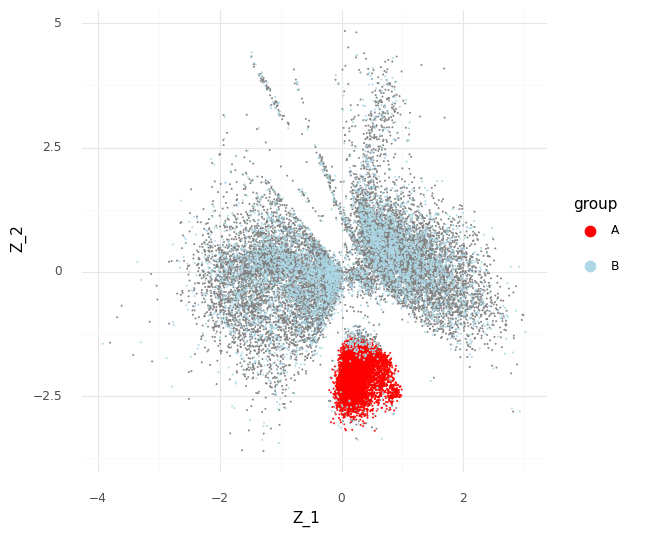

<ggplot: (-9223371905116368124)>


In [75]:
p.options.figure_size = 6, 6

p_ = (
    p.ggplot(p.aes(x = 'Z_1', y = 'Z_2'), fadata.obs)
    + p.geom_point(shape = '.', size = 0.1, color = 'grey')
    + p.geom_point(p.aes(color = 'group'), shape = '.', size = 0.1, data = pop_samples_both)
    + p.scale_color_manual({'A': 'red', 'B': 'lightblue'})
    + p.theme_minimal()
    + p.guides(color = p.guide_legend(override_aes = {'size': 8}))
)

p_.save('Figures/9.png')
print(p_)

In [148]:
pop_samples_both['group'].value_counts()

A    5000
B    5000
Name: group, dtype: int64

C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Figures/10.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\facets\facet_grid.py:136: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  margin_vars = [list(data.columns & self.rows),
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\facets\facet_grid.py:137: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  list(data.columns & self.cols)]
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\facets\facet_grid.

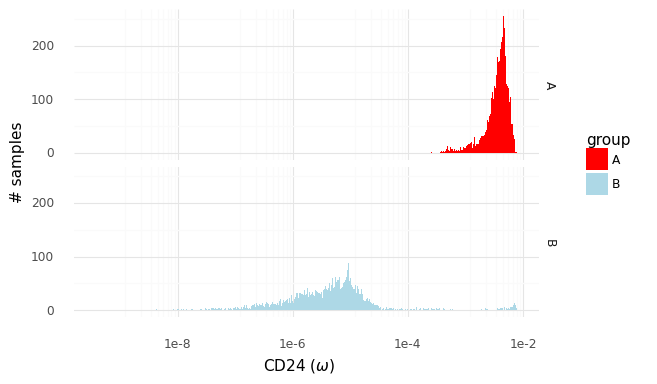

<ggplot: (-9223371905113405764)>


In [81]:
p.options.figure_size = 6, 4

p_ = (
    p.ggplot(p.aes(x = g_, fill = 'group'), pop_samples_both)
    + p.geom_histogram(bins = 512, )
    + p.scale_x_log10()
    + p.scale_fill_manual({'A': 'red', 'B': 'lightblue'})
    + p.theme_minimal()
    + p.facet_grid('group ~ .')
    + p.labs(x = f'{g_} ' + r'$( \omega )$', y = '# samples')
)

p_.save('Figures/10.png')
print(p_)

In [149]:
fold_changes = pd.Series(
    pop_samples_A[g_].pipe(np.array)
    / pop_samples_B[g_].pipe(np.array)
).rename('FC').to_frame()

fold_changes = fold_changes.assign(is_de = lambda d: np.abs(np.log2(d['FC'])) > delta)

C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6 x 2 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Figures/11.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


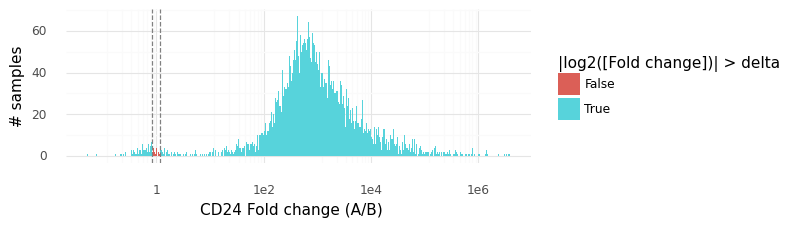

<ggplot: (-9223371905114008312)>


In [150]:
p.options.figure_size = 6, 2

p_ = (
    p.ggplot(p.aes(x = 'FC', fill = 'is_de'), fold_changes)
    + p.geom_histogram(bins = 512, )
    + p.geom_vline(xintercept = [2 ** -delta, 2 ** delta], color = 'grey', linetype = 'dashed')
    + p.scale_x_log10()
    + p.theme_minimal()
    + p.labs(x = f'{g_} Fold change (A/B)', y = '# samples', fill = '|log2([Fold change])| > delta')
)

p_.save('Figures/11.png')
print(p_)

In [86]:
fold_changes['is_de'].mean()

0.9954

In [87]:
fold_changes = fold_changes.assign(is_pos_de = lambda d: np.log2(d['FC']) > delta)
fold_changes = fold_changes.assign(is_neg_de = lambda d: np.log2(d['FC']) < -delta)

In [88]:
fold_changes['is_pos_de'].mean()

0.9764

In [89]:
fold_changes['is_neg_de'].mean()

0.019

In [90]:
def get_de_class(fc):
    if np.log2(fc) > 0.25:
        return 'Positive DE'
    if np.log2(fc) < -0.25:
        return 'Negative DE'
    else:
        return 'Not DE'

In [91]:
fold_changes['DE Class'] = fold_changes['FC'].apply(get_de_class)

C:\Users\vale\Anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


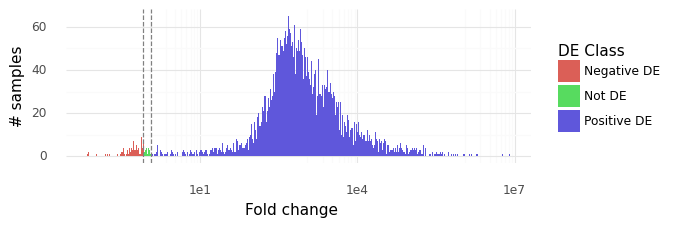

<ggplot: (-9223371905119196444)>

In [92]:
p.options.figure_size = 6, 2

(
    p.ggplot(p.aes(x = 'FC', fill = 'DE Class'), fold_changes)
    + p.geom_histogram(bins = 512, )
    + p.geom_vline(xintercept = [2 ** -delta, 2 ** delta], color = 'grey', linetype = 'dashed')
    + p.scale_x_log10()
    + p.theme_minimal()
    + p.labs(x = 'Fold change', y = '# samples', fill = 'DE Class')
)

In [93]:
2 ** fold_changes['FC'].pipe(np.log).median()

100.32720869530013

In [94]:
de_results.query('group1 == "A"').sort_values('lfc_median', ascending = False)

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
FCER2,0.9980,0.0020,6.212601,7.771152e-03,0.000170,0.0,0.25,9.767413,9.993206,2.844932,...,1.270794,0.026765,0.557060,0.011745,71.874725,1.416087,True,A vs Rest,A,Rest
CD19,0.9906,0.0094,4.657600,3.840636e-03,0.000093,0.0,0.25,9.937742,9.913342,2.703030,...,0.858800,0.022779,0.473888,0.014664,39.339100,1.107497,True,A vs Rest,A,Rest
CD79A,0.9800,0.0200,3.891820,2.758881e-02,0.000753,0.0,0.25,9.746442,9.866278,2.406688,...,4.949714,0.164365,0.969052,0.037870,250.884033,7.905702,True,A vs Rest,A,Rest
CD24,0.9956,0.0044,5.421739,3.775524e-03,0.000130,0.0,0.25,9.803099,9.680730,3.039260,...,0.570599,0.029115,0.390716,0.017227,33.359871,1.547874,True,A vs Rest,A,Rest
MS4A1,0.9878,0.0122,4.394043,2.354385e-02,0.000641,0.0,0.25,9.949182,9.553059,3.371948,...,4.586076,0.138809,0.938104,0.036375,217.468536,6.887310,True,A vs Rest,A,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CD8A,0.9652,0.0348,3.322718,3.823748e-05,0.004225,0.0,0.25,-3.025401,-4.229266,5.337519,...,0.001934,0.483918,0.001934,0.203018,0.104553,35.555283,True,A vs Rest,A,Rest
MARCO,0.9850,0.0150,4.184591,2.332333e-06,0.000313,0.0,0.25,-4.968332,-4.364031,3.322762,...,0.001934,0.111545,0.001934,0.081293,0.116520,3.089004,True,A vs Rest,A,Rest
CD4,0.9826,0.0174,4.033731,2.053153e-05,0.000722,0.0,0.25,-3.916811,-5.014413,3.421909,...,0.000000,0.195398,0.000000,0.153830,0.000000,6.932509,True,A vs Rest,A,Rest
GATA3,0.9648,0.0352,3.310874,1.155425e-05,0.000995,0.0,0.25,-3.993543,-5.343176,5.078670,...,0.000000,0.128629,0.000000,0.105495,0.000000,9.860030,True,A vs Rest,A,Rest


In [95]:
de_results2 = vae.differential_expression(groupby = 'group', delta = None)

DE...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.87s/it]


In [96]:
de_results2.query('group1 == "A"').sort_values('lfc_median', ascending = False)

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
FCER2,0.9756,0.0244,3.688469,7.722524e-03,0.000130,0.0,3.147443,9.706738,9.911602,2.842228,...,1.270794,0.026765,0.557060,0.011745,71.874725,1.416087,True,A vs Rest,A,Rest
CD79A,0.9698,0.0302,3.469248,2.754338e-02,0.000818,0.0,3.147443,9.656783,9.806477,2.422292,...,4.949714,0.164365,0.969052,0.037870,250.884033,7.905702,True,A vs Rest,A,Rest
CD19,0.9732,0.0268,3.592187,3.805378e-03,0.000100,0.0,3.147443,9.839361,9.804536,2.712622,...,0.858800,0.022779,0.473888,0.014664,39.339100,1.107497,True,A vs Rest,A,Rest
CD24,0.9676,0.0324,3.396660,3.812066e-03,0.000150,0.0,3.147443,9.726909,9.619536,3.090374,...,0.570599,0.029115,0.390716,0.017227,33.359871,1.547874,True,A vs Rest,A,Rest
IGHD,0.9728,0.0272,3.576961,3.126078e-03,0.000055,0.0,3.147443,9.479146,9.514132,2.509902,...,0.553191,0.011247,0.373308,0.007047,30.996370,0.642181,True,A vs Rest,A,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CD8A,0.6444,0.3556,0.594513,3.849646e-05,0.004068,0.0,3.147443,-3.028865,-4.137486,5.214038,...,0.001934,0.483918,0.001934,0.203018,0.104553,35.555283,False,A vs Rest,A,Rest
MARCO,0.6436,0.3564,0.591024,2.350776e-06,0.000329,0.0,3.147443,-5.000442,-4.456622,3.385959,...,0.001934,0.111545,0.001934,0.081293,0.116520,3.089004,False,A vs Rest,A,Rest
CD4,0.7766,0.2234,1.245961,2.055502e-05,0.000734,0.0,3.147443,-3.890576,-5.022543,3.496775,...,0.000000,0.195398,0.000000,0.153830,0.000000,6.932509,False,A vs Rest,A,Rest
GATA3,0.6560,0.3440,0.645519,1.156913e-05,0.000982,0.0,3.147443,-3.988351,-5.212190,5.014372,...,0.000000,0.128629,0.000000,0.105495,0.000000,9.860030,False,A vs Rest,A,Rest


In [117]:
from mizani.transforms import trans, trans_new
from mizani import breaks, formatters

class neg_log10(trans):
    @staticmethod
    def transform(x):
        return -np.log10(x)

    @staticmethod
    def inverse(x):
        return 10 ** -x
    
    
class trans_log10(trans):
    @staticmethod
    def transform(x):
        return np.log10(x)

    @staticmethod
    def inverse(x):
        return 10 ** x

    
class neg_log10_breaks:
    def __init__(self, n = 5):
        self.n = n

    def __call__(self, limits):
        _min = int(np.floor(np.log10(limits[1])))
        breaks = np.array([[10. ** k, 5. * 10. ** (k - 1)] for k in range(0, _min, -1)]).ravel()

        return breaks.tolist()

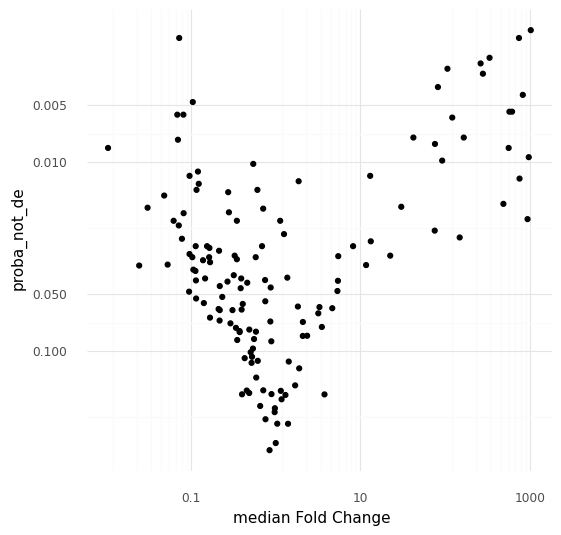

<ggplot: (-9223371905113754144)>

In [98]:
p.options.figure_size = 6, 6

(
    p.ggplot(p.aes(x = '2 ** lfc_median', y = 'proba_not_de'), de_results.query('group1 == "A"'))
    + p.geom_point()
    + p.scale_x_log10()
    + p.scale_y_continuous(
        trans = neg_log10,
        breaks = neg_log10_breaks()
    )
    + p.theme_minimal()
    + p.labs(x = 'median Fold Change')
)

C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6 x 6 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Figures/12.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


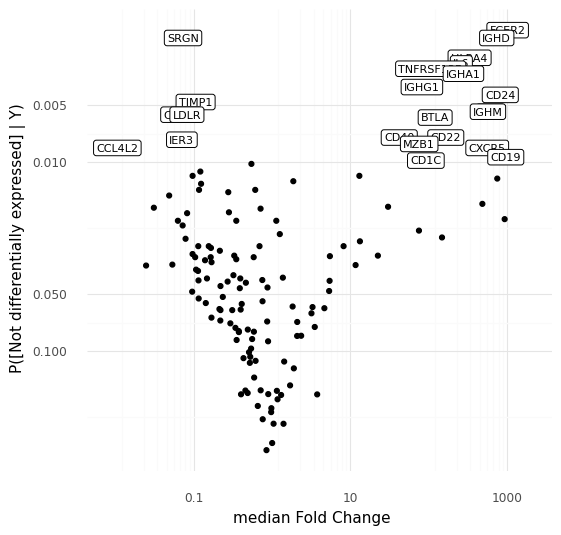

<ggplot: (-9223371905116582560)>


In [111]:
p.options.figure_size = 6, 6

p_ = (
    p.ggplot(p.aes(x = '2 ** lfc_median', y = 'proba_not_de'), de_results.query('group1 == "A"'))
    + p.geom_point()
    + p.scale_x_log10(limits = [8e-3, 2e3])
    + p.scale_y_continuous(
        trans = neg_log10,
        breaks = neg_log10_breaks()
    )
    + p.geom_label(
        p.aes(label = 'index'),
        size = 8, 
        data = de_results.query('group1 == "A"').query('proba_not_de < 0.01').reset_index()
    )
    + p.theme_minimal()
    + p.labs(x = 'median Fold Change', y = 'P([Not differentially expressed] | Y)')
)

p_.save('Figures/12.png')
print(p_)

In [112]:
# Set delta based on FDR

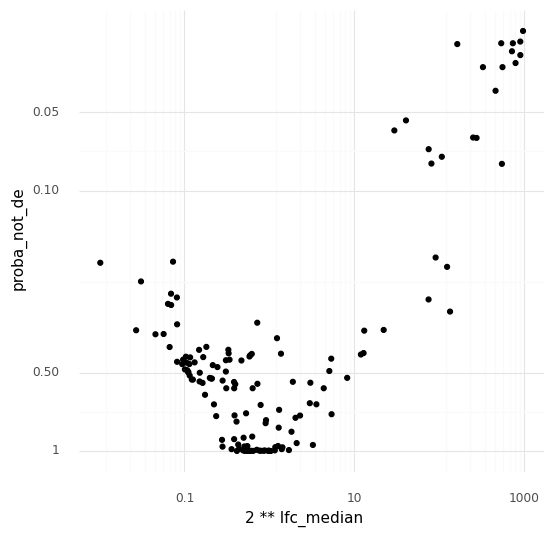

<ggplot: (-9223371905119246608)>

In [113]:
p.options.figure_size = 6, 6

(
    p.ggplot(p.aes(x = '2 ** lfc_median', y = 'proba_not_de'), de_results2.query('group1 == "A"'))
    + p.geom_point()
    + p.scale_x_log10()
    + p.scale_y_continuous(
        trans = neg_log10,
        breaks = neg_log10_breaks()
    )
    + p.theme_minimal()
)

C:\Users\vale\Anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


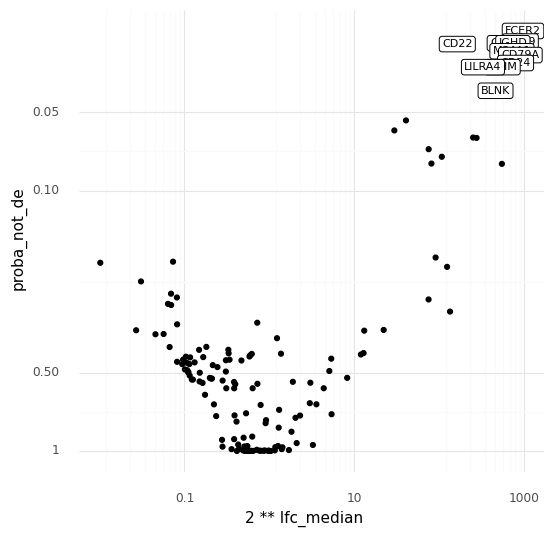

<ggplot: (-9223371905116398800)>

In [114]:
p.options.figure_size = 6, 6

(
    p.ggplot(p.aes(x = '2 ** lfc_median', y = 'proba_not_de'), de_results2.query('group1 == "A"'))
    + p.geom_point()
    + p.scale_x_log10()
    + p.scale_y_continuous(
        trans = neg_log10,
        breaks = neg_log10_breaks()
    )
    + p.geom_label(
        p.aes(label = 'index'),
        size = 8, 
        data = de_results2.query('group1 == "A"').query('proba_not_de < 0.05').reset_index()
    )
    + p.theme_minimal()
)

In [120]:
fadata.obs['g_counts'] = fadata.obs_vector(g_)

C:\Users\vale\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


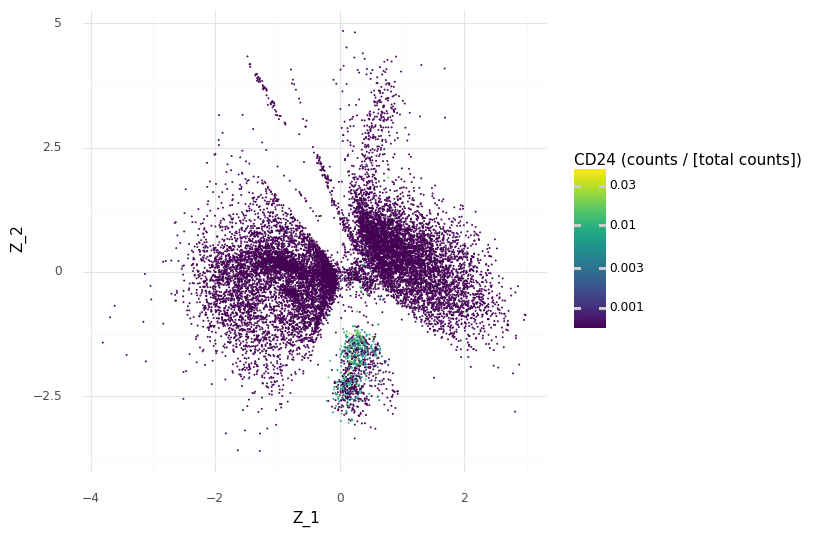

<ggplot: (-9223371905116369592)>


C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6 x 6 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Figures/13.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [132]:
p.options.figure_size = 6, 6

p_ = (
    p.ggplot(p.aes(x = 'Z_1', y = 'Z_2', color = 'g_counts / total_counts'), fadata.obs)
    + p.geom_point(shape = '.', size = 0.1)
    + p.scale_color_continuous(
        trans = trans_log10,
        breaks = breaks.log_breaks(5),
        labels = formatters.log_format()
    )
    + p.theme_minimal()
    + p.labs(color = f'{g_} (counts / [total counts])')
)

print(p_)
p_.save('Figures/13.png')

In [122]:
g_ = 'CD24'
fadata.obs['g_r'] = vae.get_normalized_expression(gene_list = [g_])[g_]

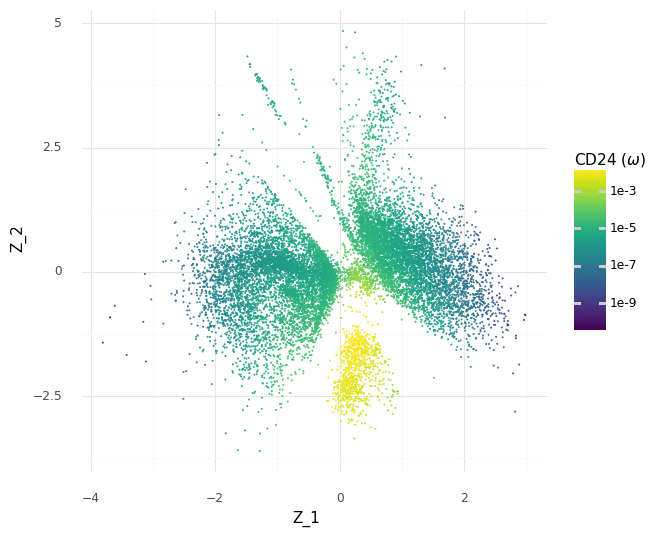

<ggplot: (-9223371905152917024)>


C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6 x 6 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: Figures/14.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [134]:
p.options.figure_size = 6, 6

p_ = (
    p.ggplot(p.aes(x = 'Z_1', y = 'Z_2', color = 'g_r'), fadata.obs)
    + p.geom_point(shape = '.', size = 0.1)
    + p.scale_color_continuous(
        trans = trans_log10,
        breaks = breaks.log_breaks(5),
        labels = formatters.log_format()
    )
    + p.theme_minimal()
    + p.labs(color = f'{g_} ' + r'$( \omega )$')
)

print(p_)
p_.save('Figures/14.png')

In [128]:
350_000 * 23 // 128

62890

In [130]:
25_000 * 308 // 128

60156